In [6]:
import pymc3 as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt


In [7]:
# Generate example data
np.random.seed(123)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, 100),
    'vehicle_age': np.random.randint(1, 10, 100),
    'claims': np.random.poisson(1.5, 100)
})

X = data[['age', 'vehicle_age']]
y = data['claims']


In [8]:
y


0     3
1     2
2     0
3     0
4     1
     ..
95    2
96    2
97    0
98    2
99    0
Name: claims, Length: 100, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
with pm.Model() as model:
    # Priors for regression coefficients
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_scaled.shape[1])
    
    # Intercept
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    
    # Linear model
    mu = intercept + pm.math.dot(X_scaled, beta)
    
    # Likelihood
    y_obs = pm.Poisson('y_obs', mu=pm.math.exp(mu), observed=y)
    
    # Posterior sampling
    trace = pm.sample(2000, tune=1000, cores=2)




/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, beta]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 43 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/benazirrowe/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


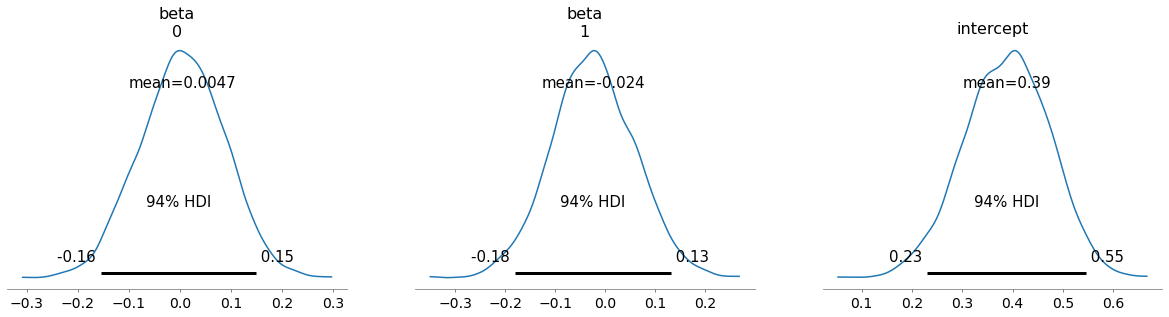

In [11]:
# Summary of posterior
az.summary(trace)

# Plot posterior distributions
az.plot_posterior(trace)
plt.show()



The summary will provide mean, standard deviation, and credible intervals for each parameter.
The posterior plot will show the distribution of the parameters, helping to understand their uncertainty.